<b>Basic Q Learning Algorithm using FrozenLake-v0<b>

In [1]:
import numpy as np
import gym
import random
random.seed(16)

In [2]:
env = gym.make("FrozenLake-v0")

/home/ayush/gym/gym/__init__.py:22: UserWarning: DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.
  warnings.warn('DEPRECATION WARNING: to improve load times, gym no longer automatically loads gym.spaces. Please run "import gym.spaces" to load gym.spaces on your own. This warning will turn into an error in a future version of gym.')


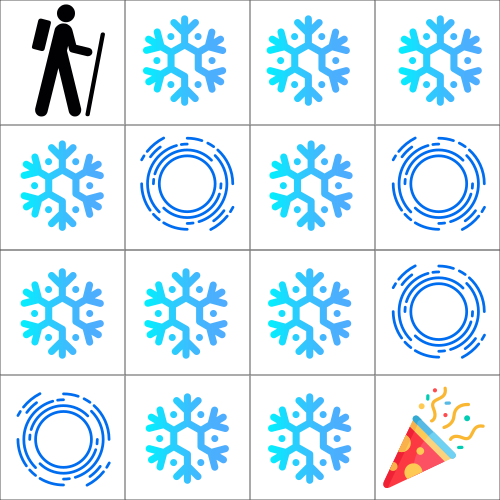

In [4]:
from IPython.display import Image, display
display(Image(filename='frozenlake.png', embed=True))

<b>The goal of this game is to go from the starting state (S) to the goal state (G) by walking only on frozen tiles (F) and avoid holes (H).However, the ice is slippery, so you won't always move in the direction you intend.<b>

In [ ]:
env.reset()

In [ ]:
env.render()

In [ ]:
env.observation_space.n

In [ ]:
env.action_space.n

<b>0-> Left<b>

<b>1-> Down<b>

<b>2-> Right<b>

<b>3-> Up<b>

<b>However, the ice is slippery, so you won't always move in the direction you intend.<b>

In [ ]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

In [ ]:
print(Q.shape)
Q

In [ ]:
G = 0 
total=0

total_episodes = 10000        # Total episodes
alpha = 0.8                   # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.95                  # Discounting rate

eet=600                       #exploitation_exploration_tradeoff

for episode in range(total_episodes):
    done = False
    G, reward = 0,0
    state = env.reset()
    for step in range(max_steps):
        
        
        if episode<eet:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state,:])
            
        #action = np.argmax(Q[state]) #1
        state2, reward, done, info = env.step(action) #2
        Q[state,action] += alpha * (reward + gamma*np.max(Q[state2,:]) - Q[state,action]) #3
        
        
        G += reward
        state = state2
        
        if done:
            #env.render()
            break
    
    

    if G==1:
        total+=1

In [ ]:
print(total/10000)
Q

In [ ]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        #env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(Q[state])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            env.render()
            break
        state = new_state
env.close()